In [146]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [147]:
# Load the dataset
data = pd.read_csv('/content/Obesity Classification.csv')

In [148]:
#Printing the dataset
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [149]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


1. The data contains 108 rows and 7 colomns
2. There are no null values and has few categorial colomns

In [150]:
#Describe the data
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


There are colomns with huge difference 75% and max values ,indicating potential outliers or skewness in data so plotting boxplot and histogram for futher analysis

In [151]:
#Print the first 5 rows of dataset
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


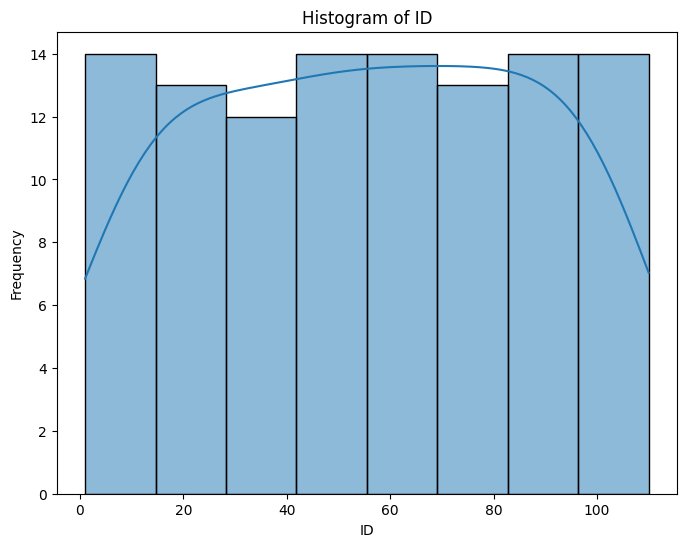

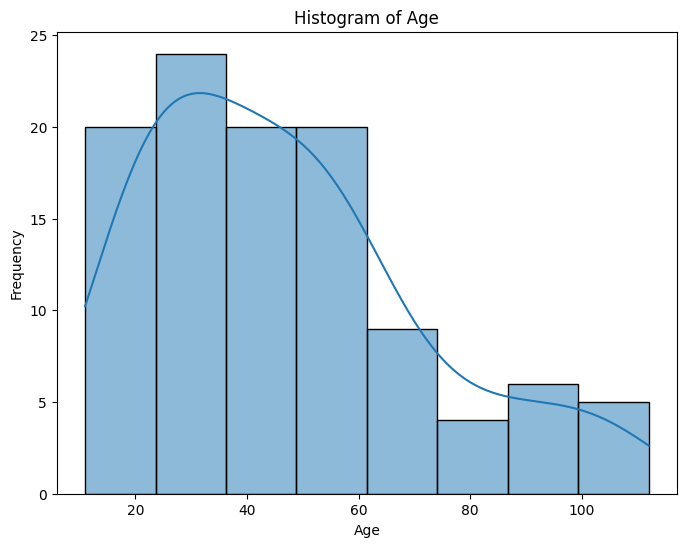

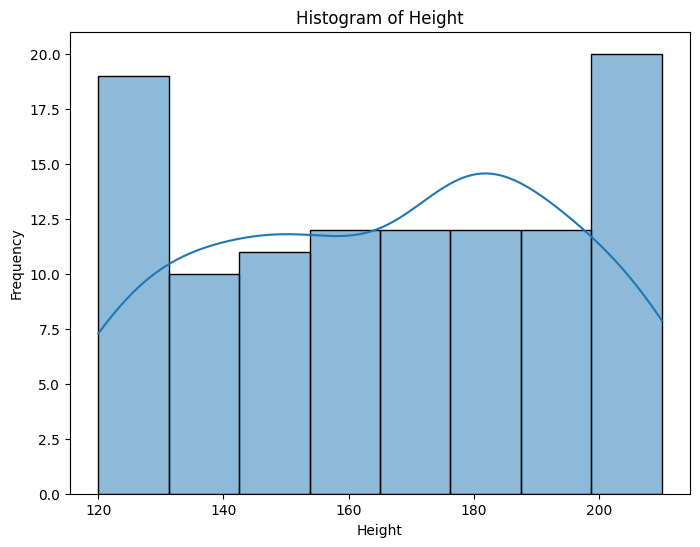

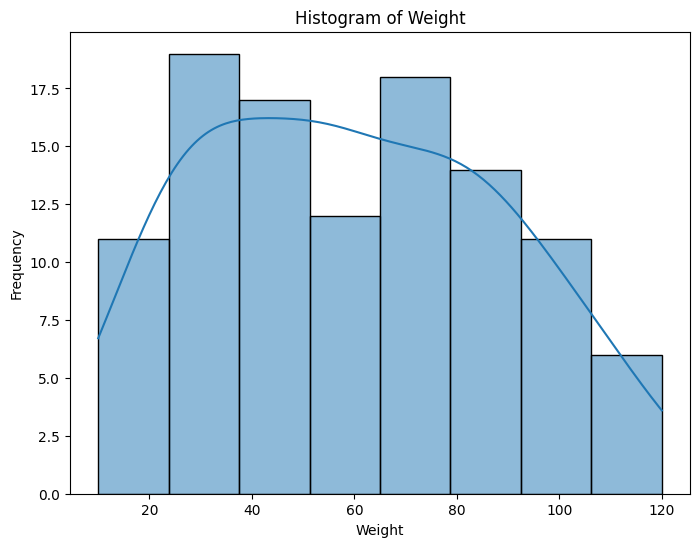

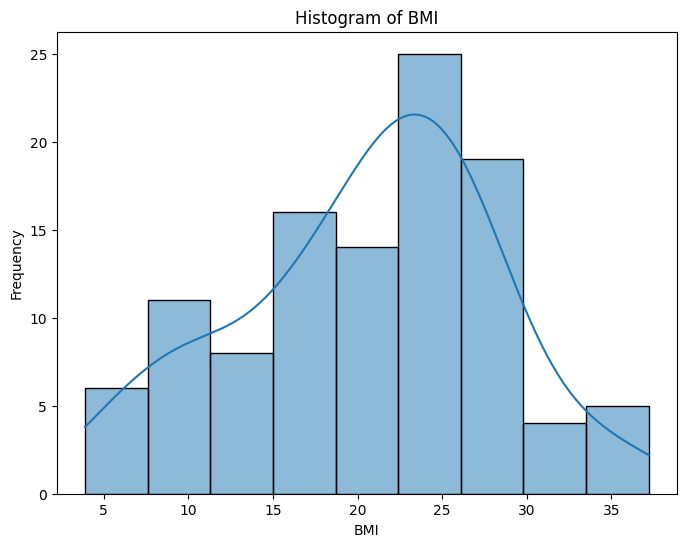

In [152]:
# histograms for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

1. The majority of data fall within the age range of 20 to 60, with the highest frequency observed in the 30–40 age group. The distribution shows a right (positive) skew, indicating that while most people are younger, there is a smaller population extending into higher age brackets (up to around 110).
2. Height ranges from 120 to 210, with a fairly even spread of data, though noticeable peaks occur around 120–130 and again at 200–210. The distribution is slightly bimodal, suggesting two groups with higher frequency—one at the shorter end and one at the taller end—possibly indicating a mixed population or multiple subgroups.
3. Weight ranges from 10 to 120 with most of the data concentrated between 30 to 90, peaking around the 30–40 range. The distribution appears slightly right-skewed, indicating that while many individuals have lower to moderate weights, a smaller number have significantly higher weights.
4. BMI Ranges from 5 to 35 with most of the data concentrated between 10 to 30 with a peak BMI value of 25. And the graph seems to be skewed to the left suggesting while most people have high or moderate bmi few tend have very smaller bmi

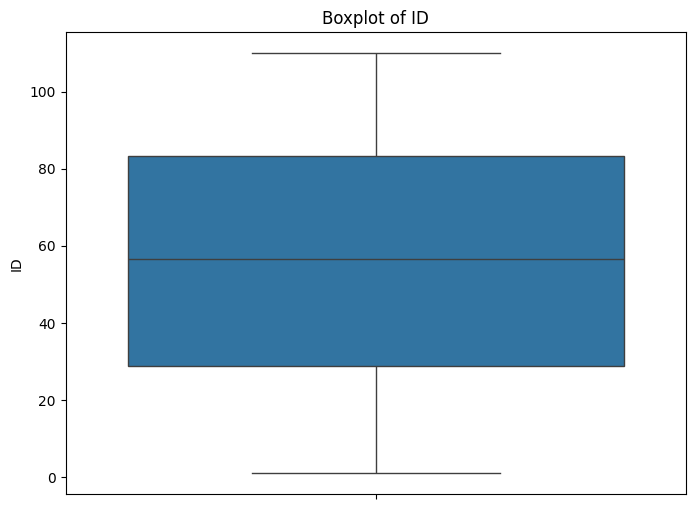

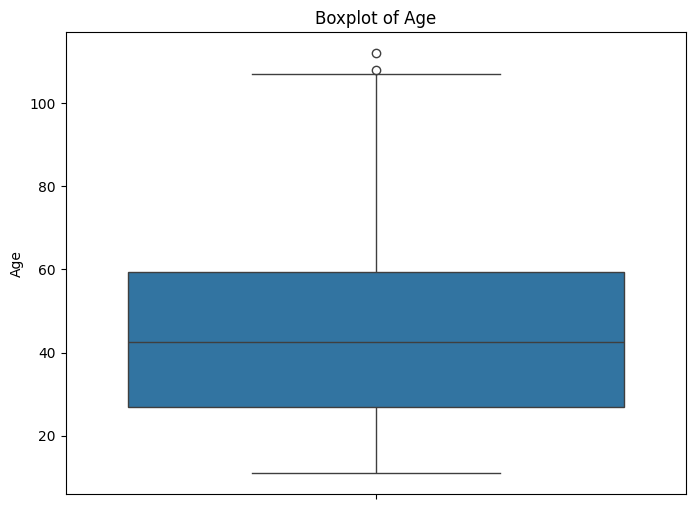

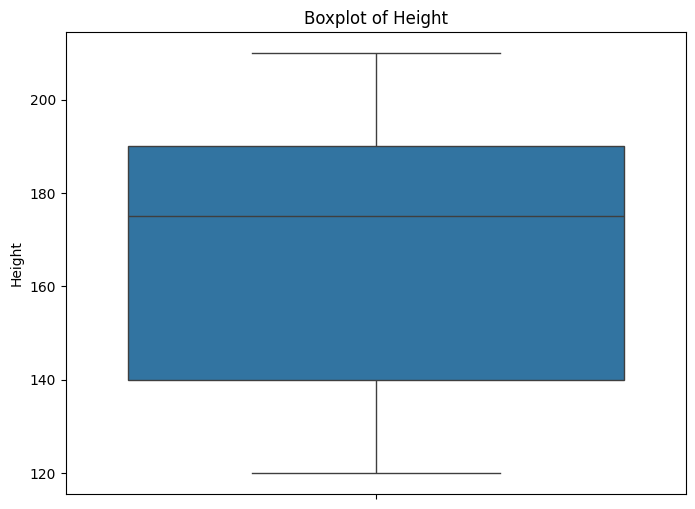

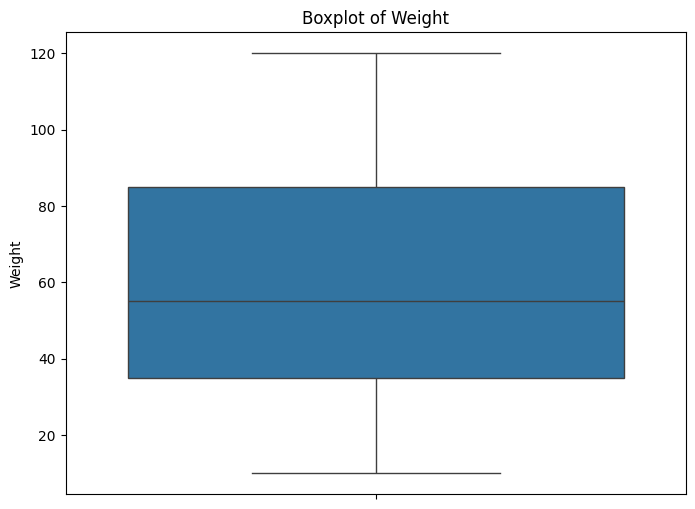

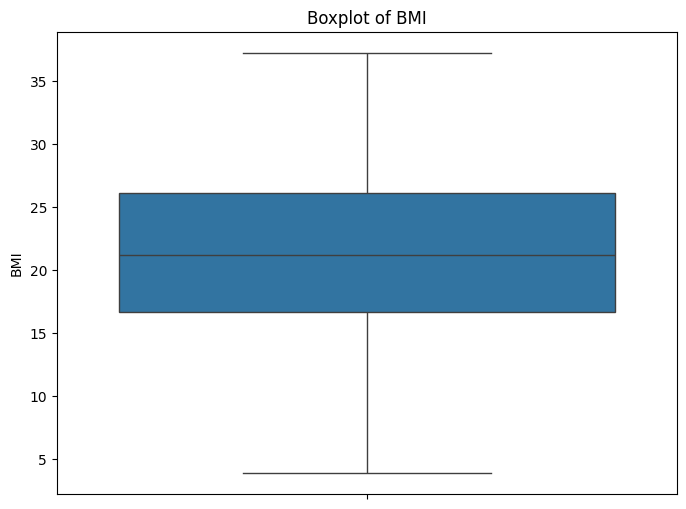

In [153]:
# boxplots for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

There are no outliers present in features except age and age has only two outliers

In [154]:
# Calculate the IQR for the 'Age' column
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['Age'] = np.where(data['Age'] > upper_bound, upper_bound, data['Age'])
data['Age'] = np.where(data['Age'] < lower_bound, lower_bound, data['Age'])

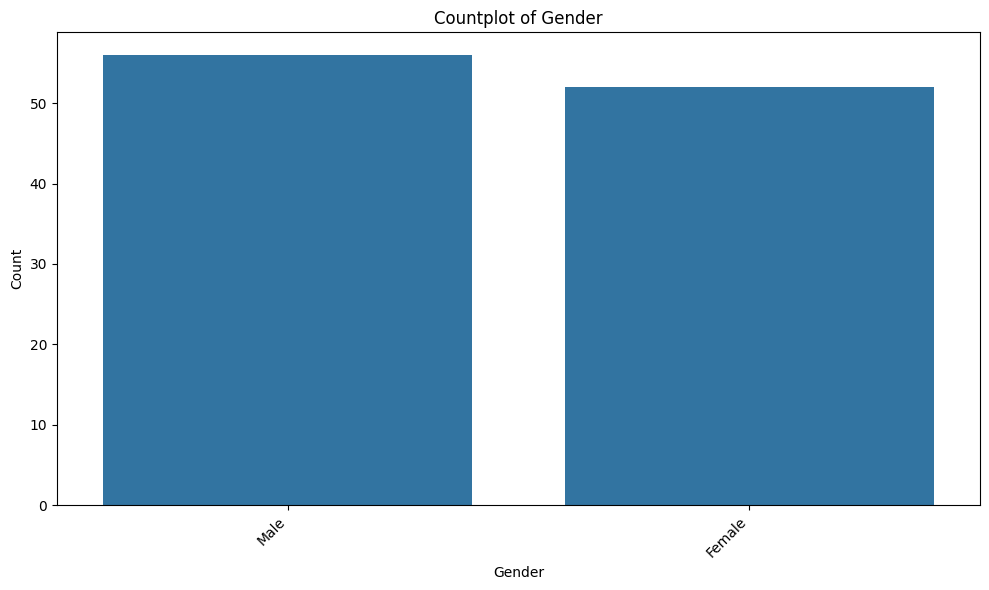

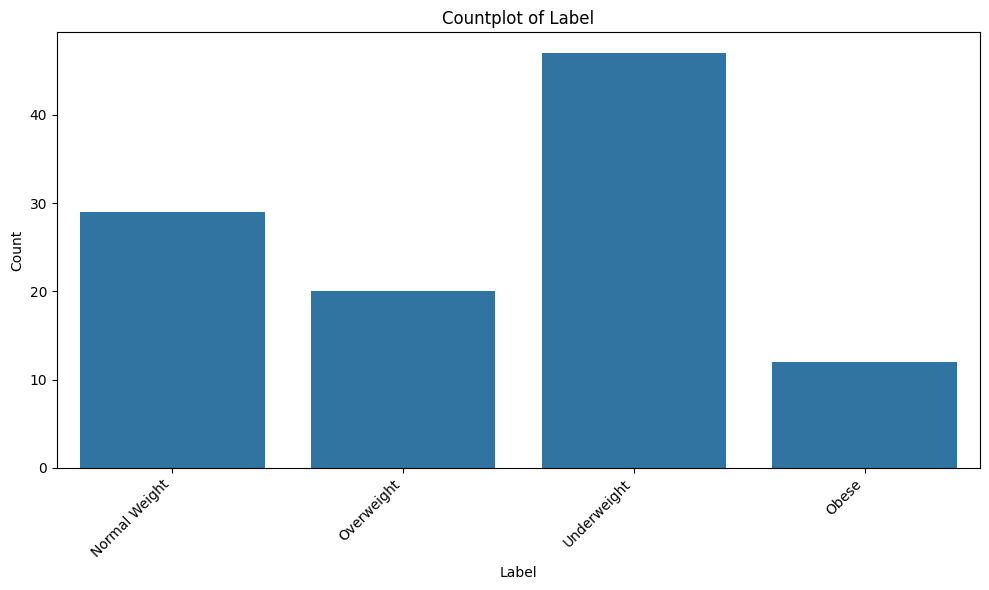

In [155]:
#Coutplot for categorial colomns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


  1. The data contains very few male individuals more than the female individuals.
  2. The data has more underweight individual, following by Normal weight and overweight with few obese individuals

In [156]:
#Print the value counts of target variable
print("\nLabel distribution:\n", data['Label'].value_counts())


Label distribution:
 Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


In [157]:
'''# One-hot encode categorical features as integers
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dummies = pd.get_dummies(data[col], prefix=col, dtype=int) #Specify dtype as int
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(col, axis=1)'''

"# One-hot encode categorical features as integers\ncategorical_cols = data.select_dtypes(include=['object']).columns\nfor col in categorical_cols:\n    dummies = pd.get_dummies(data[col], prefix=col, dtype=int) #Specify dtype as int\n    data = pd.concat([data, dummies], axis=1)\n    data = data.drop(col, axis=1)"

In [158]:
#print head of data
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25.0,Male,175,80,25.3,Normal Weight
1,2,30.0,Female,160,60,22.5,Normal Weight
2,3,35.0,Male,180,90,27.3,Overweight
3,4,40.0,Female,150,50,20.0,Underweight
4,5,45.0,Male,190,100,31.2,Obese


In [159]:
# Encoding the categorical features
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

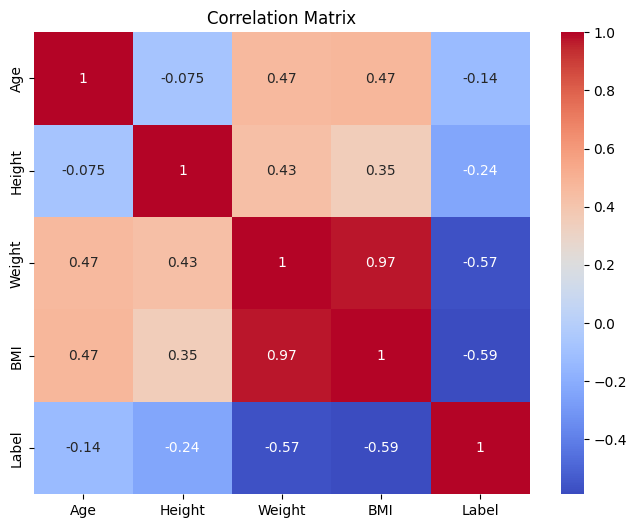

In [160]:
# Correlation matrix
features = ['Age', 'Height', 'Weight', 'BMI']
plt.figure(figsize=(8, 6))
sns.heatmap(data[features + ['Label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

BMI and weight seems to have have a high corr of 0.97 indicating multicolinearity but since the data is very scarce removing features is not recomended.


In [161]:
#droping unnecesary coloms
data.drop('ID', axis=1, inplace=True)

In [162]:
# Separate features (X) and target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [163]:
# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Gender encoded as numerical (0 for Female, 1 for Male)

2. Stratified sampling used to maintain class distribution in train/test sets

3. Features scaled to ensure equal weighting in distance calculations

4. Train set: 77 samples (70%), Test set: 33 samples (30%)

In [164]:
# Initialize and fit KNN model with default parameters (k=5)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

In [165]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9393939393939394

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         4
           2       0.86      1.00      0.92         6
           3       0.93      1.00      0.97        14

    accuracy                           0.94        33
   macro avg       0.95      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33


Confusion Matrix:
 [[ 7  0  1  1]
 [ 0  4  0  0]
 [ 0  0  6  0]
 [ 0  0  0 14]]


1. Overall Accuracy: 93.94% – The model performs very well on the test set.

2. Class-Wise Performance:

 * Class 0: High precision (1.00) but lower recall (0.78), meaning some instances were missed.

 * Class 1: Perfect precision and recall (1.00), indicating flawless classification.

 * Class 2: Good performance (0.86 precision, 1.00 recall), with no false negatives.

 * Class 3: Excellent performance (0.93 precision, 1.00 recall), correctly identifying all instances.

3. Confusion Matrix Insights:

 * Most errors occur in Class 0, where 2 instances were misclassified (1 as Class 2, 1 as Class 3).

 * Class 2 and 3 are perfectly predicted with no misclassifications.

4. conclusion:

The model performs strongly overall but struggles slightly with Class 0, possibly due to overlap with other classes.

Class 1 and 3 are the easiest to classify, while Class 0 may need further refinement.

In [166]:
#Predictions from the model
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [167]:
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, knn.predict(X_train_scaled)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, knn.predict(X_train_scaled), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, knn.predict(X_train_scaled), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, knn.predict(X_train_scaled), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 0.893
Training Precision : 0.896
Training Recall : 0.893
Training F1 Score : 0.894

Testing Accuracy : 0.939
Testing Precision : 0.946
Testing Recall : 0.939
Testing F1 Score : 0.937


1. Training Set Performance:
 * Accuracy: 89.3%, Precision: 89.6%, Recall: 89.3%, F1 Score: 89.4%
 * Indicates good learning on the training data, though not perfect — the model makes some errors.

2. Testing Set Performance:
 * Accuracy: 93.9%, Precision: 94.6%, Recall: 93.9% ,F1 Score: 93.7%
 * Surprisingly, the model performs even better on the test set, suggesting strong generalization ability.

3. Conclusion:
 * The model shows excellent performance overall.

 * The higher testing accuracy compared to training may be due to better class balance or simpler test cases.

* There’s no sign of overfitting or underfitting — the model is well-regularized and generalizes well.

In [171]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(3, 26), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("Accuracy (best model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (best model):\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (best model):\n", confusion_matrix(y_test, y_pred_best))

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': np.int64(3)}
Best cross-validation score: 0.8399999999999999
Accuracy (best model): 0.9393939393939394

Classification Report (best model):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00         4
           2       1.00      0.83      0.91         6
           3       0.93      1.00      0.97        14

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.94      0.94      0.94        33


Confusion Matrix (best model):
 [[ 8  0  0  1]
 [ 0  4  0  0]
 [ 1  0  5  0]
 [ 0  0  0 14]]


1. The model performs exceptionally well with an overall accuracy of 93.94% on the test set.

2. Class-wise performance:

 * Class 0 (support = 9): High precision (0.89) and recall (0.89), with just 1 misclassified as class 3.

 * Class 1 (support = 4): Perfect prediction – all instances classified
correctly.

 * Class 2 (support = 6): Strong precision (1.00) but slightly lower recall (0.83), indicating 1 misclassification into class 0.

 * Class 3 (support = 14): Perfect recall (1.00), all correctly predicted.

3. The confusion matrix confirms that misclassifications are minimal and mostly occur between similar or closely related classes (e.g., class 0 and 3, class 2 and 0).

4. Macro average and weighted average F1-scores are both high (0.94), showing balanced performance across all classes, even with different support counts.

5. Conclusion:
\
The KNN model with n_neighbors=3 and manhattan distance is well-tuned and achieves high accuracy and consistency, making it a reliable classifier for this multi-class problem.

In [172]:
#For the best model ussing hyperparameters
y_pred_best = best_knn.predict(X_test_scaled)
y_train_pred_best = best_knn.predict(X_train_scaled)

print('\nTraining Accuracy (best model) :', np.round(metrics.accuracy_score(y_train, y_train_pred_best),3))
print('Training Precision (best model) :', np.round(metrics.precision_score(y_train, y_train_pred_best, average='weighted'),3))
print('Training Recall (best model) :' , np.round(metrics.recall_score(y_train, y_train_pred_best, average='weighted'),3))
print('Training F1 Score (best model) :' , np.round(metrics.f1_score(y_train, y_train_pred_best, average='weighted'),3))
print('\nTesting Accuracy (best model):' ,  np.round(metrics.accuracy_score(y_test, y_pred_best),3))
print('Testing Precision (best model) :' , np.round(metrics.precision_score(y_test, y_pred_best, average='weighted'),3))
print('Testing Recall (best model) :' , np.round(metrics.recall_score(y_test, y_pred_best, average='weighted'),3))
print('Testing F1 Score (best model) :' , np.round(metrics.f1_score(y_test, y_pred_best, average='weighted'),3))


Training Accuracy (best model) : 0.96
Training Precision (best model) : 0.963
Training Recall (best model) : 0.96
Training F1 Score (best model) : 0.96

Testing Accuracy (best model): 0.939
Testing Precision (best model) : 0.941
Testing Recall (best model) : 0.939
Testing F1 Score (best model) : 0.939


1. Training set:
 * Accuracy: 96% , Precision, Recall, F1 Score: All around 96%
 * The model fits the training data very well without being overly complex.
2. Testing Set:
 * Accuracy: 93.9%, Precision, Recall, F1 Score: All around 93.9% – 94.1%
 * The model maintains strong performance on unseen data, confirming its generalization capability.
3. Conclusion:
 * The small gap between training and testing scores (≈2%) suggests no significant overfitting or underfitting.

 * The model is accurate, consistent, and balanced across different evaluation metrics, making it highly reliable for classification tasks on this dataset.

📌 What is KNN?
\
KNN is a supervised learning algorithm used for classification and regression. It predicts the label of a data point based on the majority class of its K closest neighbors in the feature space.

\
🔍 Assumptions of KNN:

 * Similar inputs have similar outputs (i.e., data points that are close together likely belong to the same class).

 * The dataset is well-scaled, as KNN is distance-based.

 * No assumptions are made about the underlying data distribution.

\
✅ Advantages:

 * Simple and easy to understand.

 * No training time – all computation happens during prediction.

 * Naturally handles multi-class problems.

 * Non-parametric – doesn’t assume any distribution.

\
⚠️ Disadvantages:

 * Computationally expensive on large datasets (slow predictions).

 * Sensitive to irrelevant features and feature scaling.

 * Struggles with imbalanced datasets.

 * Affected by curse of dimensionality  performance can degrade with many features.

\
⚙️ Hyperparameters Used & Why

| **Hyperparameter**         | **Description**                          | **Reason**                                                                 |
|----------------------------|------------------------------------------|----------------------------------------------------------------------------|
| `n_neighbors`              | Number of neighbors to consider          | Start with 5 (common default); tuned from 1–20 for optimal balance         |
| `metric`                   | Distance metric (`euclidean`, `manhattan`) | Tried both to test which fits data geometry best                          |
| `weights` (default `uniform`) | Weighting of neighbors' vote            | Defaulted to equal votes; can also try `distance` in further tuning        |

\
📈 Why These Choices?
1. Scaling is critical for KNN due to distance-based nature.

2. Cross-validation ensures the selected K generalizes well.

3. Grid search allows systematic tuning across common distance metrics.